This is a notebook which we used to work out of, then when something worked we transfered it to the README for safe keeping. This notebook shows the different code we tried, and the working final code which is also in the README.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Fancy plots
plt.style.use('fivethirtyeight')

import pandas as pd

In [3]:
performance_data = pd.read_csv('england_ks2final_primary.csv')
performance_data

I merged the two cells above into one cell in the README, to make it a bit more efficiant

In [4]:
performance_data.columns

Index([u'RECTYPE', u'ALPHAIND', u'LEA', u'ESTAB', u'URN', u'SCHNAME',
       u'ADDRESS1', u'ADDRESS2', u'ADDRESS3', u'TOWN',
       ...
       u'GAP_2YR_PRWRIT', u'GAP_3YR_PRMAT', u'GAPN_3YR_RWMX_FSMCLA',
       u'GAPN_2YR_PRREAD_FSMCLA', u'GAPN_2YR_PRWRIT_FSMCLA',
       u'GAPN_3YR_PRMAT_FSMCLA', u'GAPN_3YR_RWMX_NOTFSMCLA',
       u'GAPN_2YR_PRREAD_NOTFSMCLA', u'GAPN_2YR_PRWRIT_NOTFSMCLA',
       u'GAPN_3YR_PRMAT_NOTFSMCLA'],
      dtype='object', length=300)

In [5]:
performance_data = performance_data.drop(['RECTYPE','PCODE','TELNUM','PKS1EXP_L'],axis=1)

Do we need a list of columns? Yes, to clean those we don't need.

In [6]:
schoolpolutiondata = pd.read_csv('school polution.csv')
schoolpolutiondata = schoolpolutiondata.drop(['Unnamed: 12', 'Close Date'],axis=1)

primary_data = schoolpolutiondata[schoolpolutiondata['Phase of education'] == 'Primary']

#Absences = pd.read_csv('england_abs.csv')

#Absences_polution=pd.merge(Absences, primary_data, on='URN')

#Absences_polution = Absences_polution.drop (['Unnamed: 12', 'Close Date', 'PPERSABS15'], axis=1)

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
performance_abs_pol = pd.merge(schoolpolutiondata, performance_data, on='URN')

I merged the two cells above in the README file.

# What follows are failed attempts of cleaning up data

###### Attempt 1:
    Null_values = performance_abs_pol['TAPS'].isnull()
    Clean = Null_values['TAPS'].isnull() == False
    Clean_perf_abs_pol = performance_abs_pol[Clean]
    Clean_perf_abs_pol = Clean_perf_abs_pol[Clean_perf_abs_pol['TAPS']!='SUPP']
    Clean_perf_abs_pol = Clean_perf_abs_pol[Clean_perf_abs_pol['TAPS']!='NA']

###### Attempt 2:

    #this code finds non float values
    cnt = 0
    for row in performance_abs_pol['TAPS']:
        if type(row)== float:
            print(row)
            print('not float')
        cnt += 1

###### Attempt 2.5: Made a variable TAPS to store the values needed and then realized it would be harder to corelate it back to the data frame than just sliceing the data frame:
    TAPS = np.zeros(len(performance_abs_pol['TAPS']))
    cnt = 0
    delete = 0
    for row in performance_abs_pol['TAPS']:
        if row is not np.nan:
            if isfloat(row) == True:
                TAPS[cnt] = float(row)
                cnt += 1
            else:
                delete+=1
        else:
            delete+=1
    TAPS = TAPS[:-delete]

# But wait, there is more!
###### Attempt 3:
    for row in performance_abs_pol['TAPS']:
        if row is not np.nan:
            if isfloat(row):
                performance_abs_pol['TAPS'][cnt] = float(row)
            else:
                performance_abs_pol['TAPS'][cnt] = np.nan
                b=cnt
        cnt += 1
    print (type(performance_abs_pol['TAPS'][0]))

# Then we finaly found what works

How it works:
I found a function that checks if a value can be converted into a float and put it in the cell below.
Source: Eric Leschinski: https://stackoverflow.com/questions/736043/checking-if-a-string-can-be-converted-to-float-in-python

The way it does that is: it attempts to convert the variable to float by using the function float(). We expect to have the following non float values: NaN, NA and SUPP. NaN will be pass throu the function and will be verified directly. The other non float values will raise "ValueError". This error is accounted for in the function and makes the function return "False".

In [8]:
def isfloat(value):
  try:
    float(value)      #try to convert to float
    return True
  except ValueError:  #it's a word so it can't convert to float
    return False

In [9]:
isfloat('12.98')

True

In [10]:
isfloat('SUPP')

False

In [11]:
isfloat(NaN)

True

Then, we make a bool array(clean) of lenght equal to that of the colomn we want to sort.

The array will have True at the positions of numbers and False at the positions of words and NaN values

In [12]:
#used to have isfloat(row)==True, then realized it was redundent
clean = np.zeros(len(performance_abs_pol['TAPS']),dtype=bool)
cnt = 0
delete = 0
for row in performance_abs_pol['TAPS']:
    if row is not np.nan and isfloat(row):
        clean[cnt] = True
    else:
        clean[cnt] = False
    cnt += 1

After that we use "clean" to sort the data frame

In [13]:
#This delets all non numbers
Clean_perf_abs_pol = performance_abs_pol[clean]

In [14]:
#This makes the remaining data in float
#It also gives a warning but if I try to put loc anywhere it gives an error
Clean_perf_abs_pol["TAPS"] = Clean_perf_abs_pol["TAPS"].astype(np.float)

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  IPKernelApp.launch_instance(kernel_class=SageKernel)


In [15]:
#https://stackoverflow.com/questions/49887707/python-with-pandas-keyerror-uthe-label-422-is-not-in-the-index
#This checkes how many floats are in the rubric we are interested in compared to the total
cnt = 0
a = 0
for i in Clean_perf_abs_pol["TAPS"]:
    a += 1
    if type(i) == float:
        cnt += 1
print [a,cnt]

[1503, 1503]


In [16]:
#GRANTFUNDING
funds = pd.read_csv('england_cfr.csv')

In [17]:
new = pd.merge(Clean_perf_abs_pol,funds,on = 'URN')

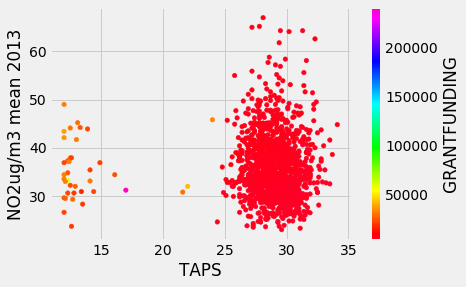

In [18]:
new.plot.scatter('TAPS', 'NO2ug/m3 mean 2013',c = 'GRANTFUNDING', colormap = 'gist_rainbow')

In [19]:
Above = Clean_perf_abs_pol[Clean_perf_abs_pol['Above limit']=='Yes']
Under = Clean_perf_abs_pol[Clean_perf_abs_pol['Above limit']=='No']

In [20]:
np.median(Clean_perf_abs_pol['TAPS'])

29.0

In [21]:
np.median(Above['TAPS'])

28.7

In [22]:
np.median(Under['TAPS'])

29.1

In [23]:
#do simulation

Here I am changing the data frame above into an array so I can shuffle it to run a simulation (like Matthew said).

In [24]:
clean_perf_TAPS_array = Clean_perf_abs_pol['TAPS'].values
clean_perf_TAPS_array

array([28.1, 27.8, 27.8, ..., 27.3, 31.1, 29.6])

In [25]:
clean_perf_NO2_array = Clean_perf_abs_pol['NO2ug/m3 mean 2013'].values
clean_perf_NO2_array

array([67. , 65.2, 38.3, ..., 23.5, 23.3, 23. ])

In [26]:
random.shuffle(clean_perf_TAPS_array)
random.shuffle(clean_perf_NO2_array)

In [27]:
clean_perf_TAPS_array

array([14.9, 29.1, 30.9, ..., 29.2, 29.7, 28.4])

In [28]:
clean_perf_NO2_array

array([31. , 42.1, 34.1, ..., 31.4, 43.6, 35.5])

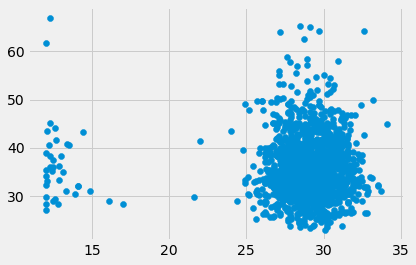

In [29]:
plt.scatter(clean_perf_TAPS_array,clean_perf_NO2_array)

In [30]:
TAPS = Clean_perf_abs_pol['TAPS']
polution = Clean_perf_abs_pol['NO2ug/m3 mean 2013']